#Bridge Quality Project

**Introducción**

En la búsqueda de implementar modelos de Machine Learning de forma práctica, se selecciona el conjunto de datos de National Bridge Inventory (NBI), el cual recopila información desde 1990 a 2022 de diferentes puentes en el estado de Georgia, Estados Unidos para la realización del proyecto.

**Objetivos**

*   Realizar un análisis exploratorio para identificar las variables más importantes que contribuyen al deterioro del puente. Esto incluiría analizar la relación entre el tráfico, el clima, el material y el diseño de la estructura, y cómo estos afectan la condición del puente para, de ese modo, informar en decisiones de diseño y mantenimiento para futuras construcciones de puentes.
*   Desarrollar un modelo que prediga la condición del puente (buena, regular, mala) en función de variables como el tráfico promedio diario, el año de construcción, las condiciones climáticas, y las características estructurales.
*   Crear un modelo para estimar la edad o el tiempo de vida útil restante del
puente, basado en factores como la carga diaria, el material del puente, la condición de la subestructura, y las condiciones climáticas.



##Carga de datos

In [1]:
#Lectura en collab
from google.colab import drive

#Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('https://drive.google.com/uc?id=1LS7Gxfe-vUdaO8JlNRdgVPHMupbjYEmz')

data.head()

<ipython-input-3-773d2052e620>:1: DtypeWarning: Columns (3,4,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://drive.google.com/uc?id=1LS7Gxfe-vUdaO8JlNRdgVPHMupbjYEmz')


,Year,1 - State Code,1 - State Name,8 - Structure Number,2022 NBI Structure Number,22 - Owner Agency,3 - County Code,3 - County Name,27 - Year Built,29 - Average Daily Traffic,...,115 - Year of Future Average Daily Traffic,96 - Total Project Cost,Computed - Average Daily Truck Traffic (Volume),Average Relative Humidity,Average Temperature,Maximum Temperature,Minimum Temperature,Mean Wind Speed,City - InfoBridge Place Code,City - InfoBridge Place Name
0,1990,13,Georgia,24300160,24300160,County Highway Agency,243.0,Randolph County,1939.0,660.0,...,2010.0,NaN,46.0,73.0,19.2,39.6,-5.9,0.0,NaN,NaN
1,1990,13,Georgia,13100420,13100420,County Highway Agency,131.0,Grady County,1973.0,270.0,...,2010.0,NaN,11.0,74.0,20.6,40.1,-3.0,0.0,NaN,NaN
2,1990,13,Georgia,13100440,13100440,County Highway Agency,131.0,Grady County,1971.0,270.0,...,2010.0,NaN,19.0,72.0,20.4,39.5,-3.8,1.0,NaN,NaN
3,1990,13,Georgia,6350030,6350030,County Highway Agency,63.0,Clayton County,1961.0,4500.0,...,2010.0,113.0,45.0,75.0,17.1,38.2,-6.6,1.0,NaN,NaN
4,1990,13,Georgia,24300230,24300230,County Highway Agency,243.0,Randolph County,1964.0,240.0,...,2010.0,NaN,17.0,73.0,19.7,39.1,-5.4,2.0,NaN,NaN


##Exploración inicial

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425638 entries, 0 to 425637
Data columns (total 42 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Year                                             425638 non-null  int64  
 1   1 - State Code                                   425638 non-null  int64  
 2   1 - State Name                                   425638 non-null  object 
 3   8 - Structure Number                             425638 non-null  object 
 4   2022 NBI Structure Number                        425638 non-null  object 
 5   22 - Owner Agency                                425618 non-null  object 
 6   3 - County Code                                  425207 non-null  float64
 7   3 - County Name                                  425207 non-null  object 
 8   27 - Year Built                                  425636 non-null  float64
 9   29 - Average Da

Se observa que el conjunto de datos cuenta con 425,638 filas y 42 columnas, las cuales son desde variables numéricas (30) hasta categóricas (12).

Por otra parte, se observa la presencia de valores nulos en varias columnas, por lo que se realiza un conteo exacto a continuación:

In [5]:
data.isnull().sum()

,0
Year,0
1 - State Code,0
1 - State Name,0
8 - Structure Number,0
2022 NBI Structure Number,0
22 - Owner Agency,20
3 - County Code,431
3 - County Name,431
27 - Year Built,2
29 - Average Daily Traffic,103


Es importante destacar que las variables 'City - InfoBridge Place Code' y 'City - InfoBridge Place Name' cuentan con un alto porcentaje de nulos, al rededor de 96%, por lo que son variables que aportan poca información y serán difíciles de completar en caso de tratar de imputar los valores.

Otra variable que presenta una gran cantidad de valores nulos es '106 - Year Reconstructed', sin embargo, dada la naturaleza de la misma, parece buena idea mantener esos nulos y reemplazarlos por algo más, puesto que no implica falta de información, sino que no ha habido reconstrucción de ese puente.

Por otra parte, se obtiene el dato de cuántas valores únicos posee cada variable.

In [6]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valores únicos")

Year: 33 valores únicos
1 - State Code: 1 valores únicos
1 - State Name: 1 valores únicos
8 - Structure Number: 26133 valores únicos
2022 NBI Structure Number: 26133 valores únicos
22 - Owner Agency: 19 valores únicos
3 - County Code: 159 valores únicos
3 - County Name: 159 valores únicos
27 - Year Built: 124 valores únicos
29 - Average Daily Traffic: 8152 valores únicos
43A - Main Span Material: 10 valores únicos
43B - Main Span Design: 17 valores únicos
45 - Number of Spans in Main Unit: 49 valores únicos
49 - Structure Length (ft.): 1433 valores únicos
CAT10 - Bridge Condition: 3 valores únicos
Bridge Age (yr): 155 valores únicos
CAT29 - Deck Area (sq. ft.): 15653 valores únicos
17 - Longitude (decimal): 40275 valores únicos
16 - Latitude (decimal): 39956 valores únicos
106 - Year Reconstructed: 93 valores únicos
34 - Skew Angle (degrees): 87 valores únicos
48 - Length of Maximum Span (ft.): 422 valores únicos
51 - Bridge Roadway Width Curb to Curb (ft.): 510 valores únicos
91 - Des

In [7]:
data.describe()

,Year,1 - State Code,3 - County Code,27 - Year Built,29 - Average Daily Traffic,45 - Number of Spans in Main Unit,49 - Structure Length (ft.),Bridge Age (yr),CAT29 - Deck Area (sq. ft.),17 - Longitude (decimal),...,114 - Future Average Daily Traffic,115 - Year of Future Average Daily Traffic,96 - Total Project Cost,Computed - Average Daily Truck Traffic (Volume),Average Relative Humidity,Average Temperature,Maximum Temperature,Minimum Temperature,Mean Wind Speed,City - InfoBridge Place Code
count,425638.000000,425638.0,425207.000000,425636.000000,425535.000000,425624.000000,425638.000000,425636.000000,4.256380e+05,425638.000000,...,425625.000000,425550.000000,353461.000000,424950.000000,408893.000000,408893.000000,408893.000000,408893.000000,408893.000000,15034.000000
mean,2006.988276,13.0,150.706148,1971.000110,9308.291447,3.767445,144.096031,35.988164,6.845335e+03,-83.554114,...,13808.291841,2022.883574,1169.653755,542.579991,75.380735,17.332276,37.958528,-7.951831,0.833714,10106.553346
std,9.444970,0.0,90.299409,19.999443,24365.067705,3.029465,266.881255,20.622249,1.868727e+04,3.886103,...,36547.847836,29.861815,19354.243899,2043.613647,3.293233,1.744212,2.258438,3.131863,0.853675,21557.774322
min,1990.000000,13.0,1.000000,1850.000000,0.000000,0.000000,20.000000,0.000000,0.000000e+00,-86.653110,...,0.000000,0.000000,0.000000,0.000000,66.000000,11.600000,31.000000,-26.100000,0.000000,0.000000
25%,1999.000000,13.0,73.000000,1959.000000,500.000000,2.000000,31.800000,20.000000,7.748000e+02,-84.500000,...,735.000000,2017.000000,0.000000,2.000000,73.000000,16.100000,36.600000,-9.300000,0.000000,0.000000
50%,2007.000000,13.0,135.000000,1970.000000,1590.000000,3.000000,71.900000,34.000000,2.419400e+03,-83.881670,...,2325.000000,2025.000000,30.000000,24.000000,76.000000,17.300000,38.300000,-7.100000,1.000000,0.000000
75%,2015.000000,13.0,225.000000,1986.000000,7110.000000,4.000000,186.700000,50.000000,7.635000e+03,-83.063330,...,10410.000000,2031.000000,343.000000,237.000000,78.000000,18.700000,39.500000,-6.100000,2.000000,4000.000000
max,2022.000000,13.0,321.000000,2022.000000,415300.000000,104.000000,77799.900000,154.000000,5.743095e+06,0.000000,...,622950.000000,3008.000000,999999.000000,47355.000000,84.000000,21.600000,44.600000,3.300000,3.000000,85128.000000


Se obtienen las estadísticas descriptivas iniciales para las variables numéricas en donde se observa de forma general que el conjunto es rico en información y variabilidad.

Posteriormente, se obtienen las variables categóricas para poder observar las diferentes categorías que componen a cada una, así como el conteo de valores por categoría

In [8]:
# Selecciona columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object', 'category']).columns
print(columnas_categoricas)

Index(['1 - State Name', '8 - Structure Number', '2022 NBI Structure Number',
       '22 - Owner Agency', '3 - County Name', '43A - Main Span Material',
       '43B - Main Span Design', 'CAT10 - Bridge Condition',
       '58 - Deck Condition Rating', '59 - Superstructure Condition Rating',
       '60 - Substructure Condition Rating', 'City - InfoBridge Place Name'],
      dtype='object')


In [9]:
variable= '43A - Main Span Material'
data[[variable]].value_counts()

,count
43A - Main Span Material,
Concrete,245118
Steel,79764
Prestressed Concrete,58941
Steel Continuous,30238
Wood or Timber,4214
Prestressed Concrete Continuous,3545
Concrete Continuous,3122
"Aluminum, Wrought Iron or Cast Iron",350
Masonry,282


Luego, con las variables numéricas , se generan los histogramas para poder tener una idea de la distribución de las variables.

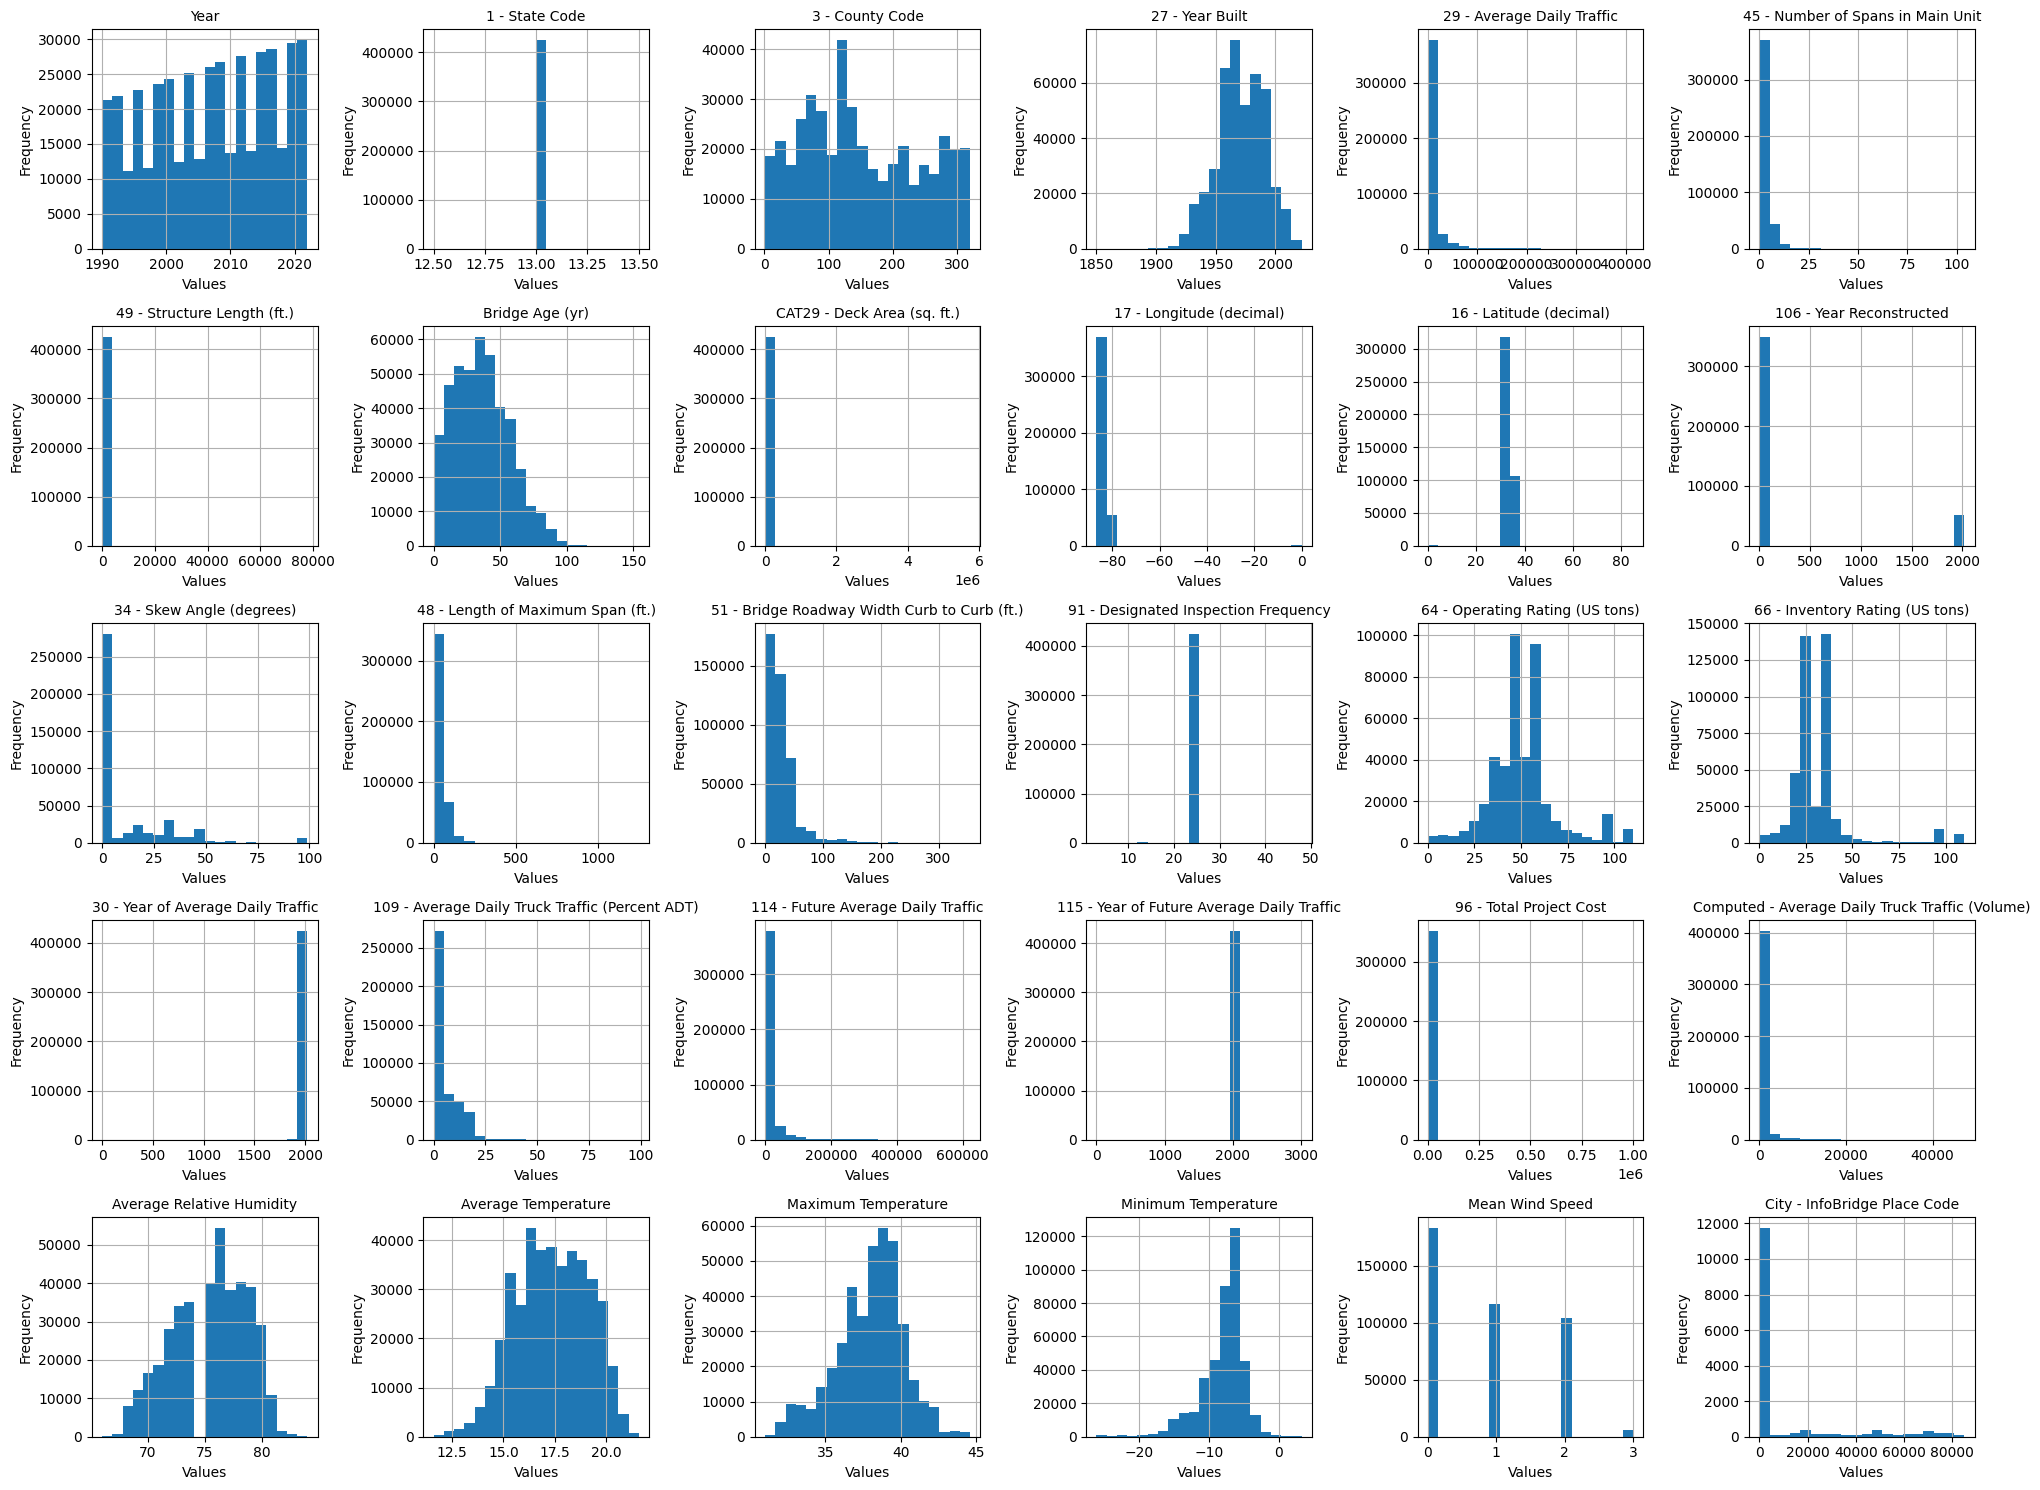

In [ ]:
# Configuración de una cuadrícula de 5x6 para 30 variables
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()

# Crear histogramas para cada columna
for i, col in enumerate(data.select_dtypes(include=['number']).columns[:30]):  # Asegurándonos de tomar solo las numéricas
    data[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Values")

# Eliminar ejes sobrantes si hay menos de 30 variables
for j in range(30, len(axes)):
    fig.delaxes(axes[j])

# Ajuste de espacio entre gráficos
plt.tight_layout()
plt.show()

Del mismo modo, la matriz de correlación con su mapa de calor, para poder tener una idea inicial de las relaciones lineales más evidentes.

In [ ]:
# Selecciona solo columnas numéricas
datos_numericos = data.select_dtypes(include=['number'])

# Calcula la matriz de correlación
matriz_correlacion = datos_numericos.corr()
print(matriz_correlacion)


                                                     Year  1 - State Code  \
Year                                             1.000000             NaN   
1 - State Code                                        NaN             NaN   
3 - County Code                                  0.000293             NaN   
27 - Year Built                                  0.169164             NaN   
29 - Average Daily Traffic                       0.017434             NaN   
45 - Number of Spans in Main Unit                0.029353             NaN   
49 - Structure Length (ft.)                      0.020939             NaN   
Bridge Age (yr)                                  0.293945             NaN   
CAT29 - Deck Area (sq. ft.)                      0.024879             NaN   
17 - Longitude (decimal)                         0.016698             NaN   
16 - Latitude (decimal)                         -0.005504             NaN   
106 - Year Reconstructed                         0.089275             NaN   

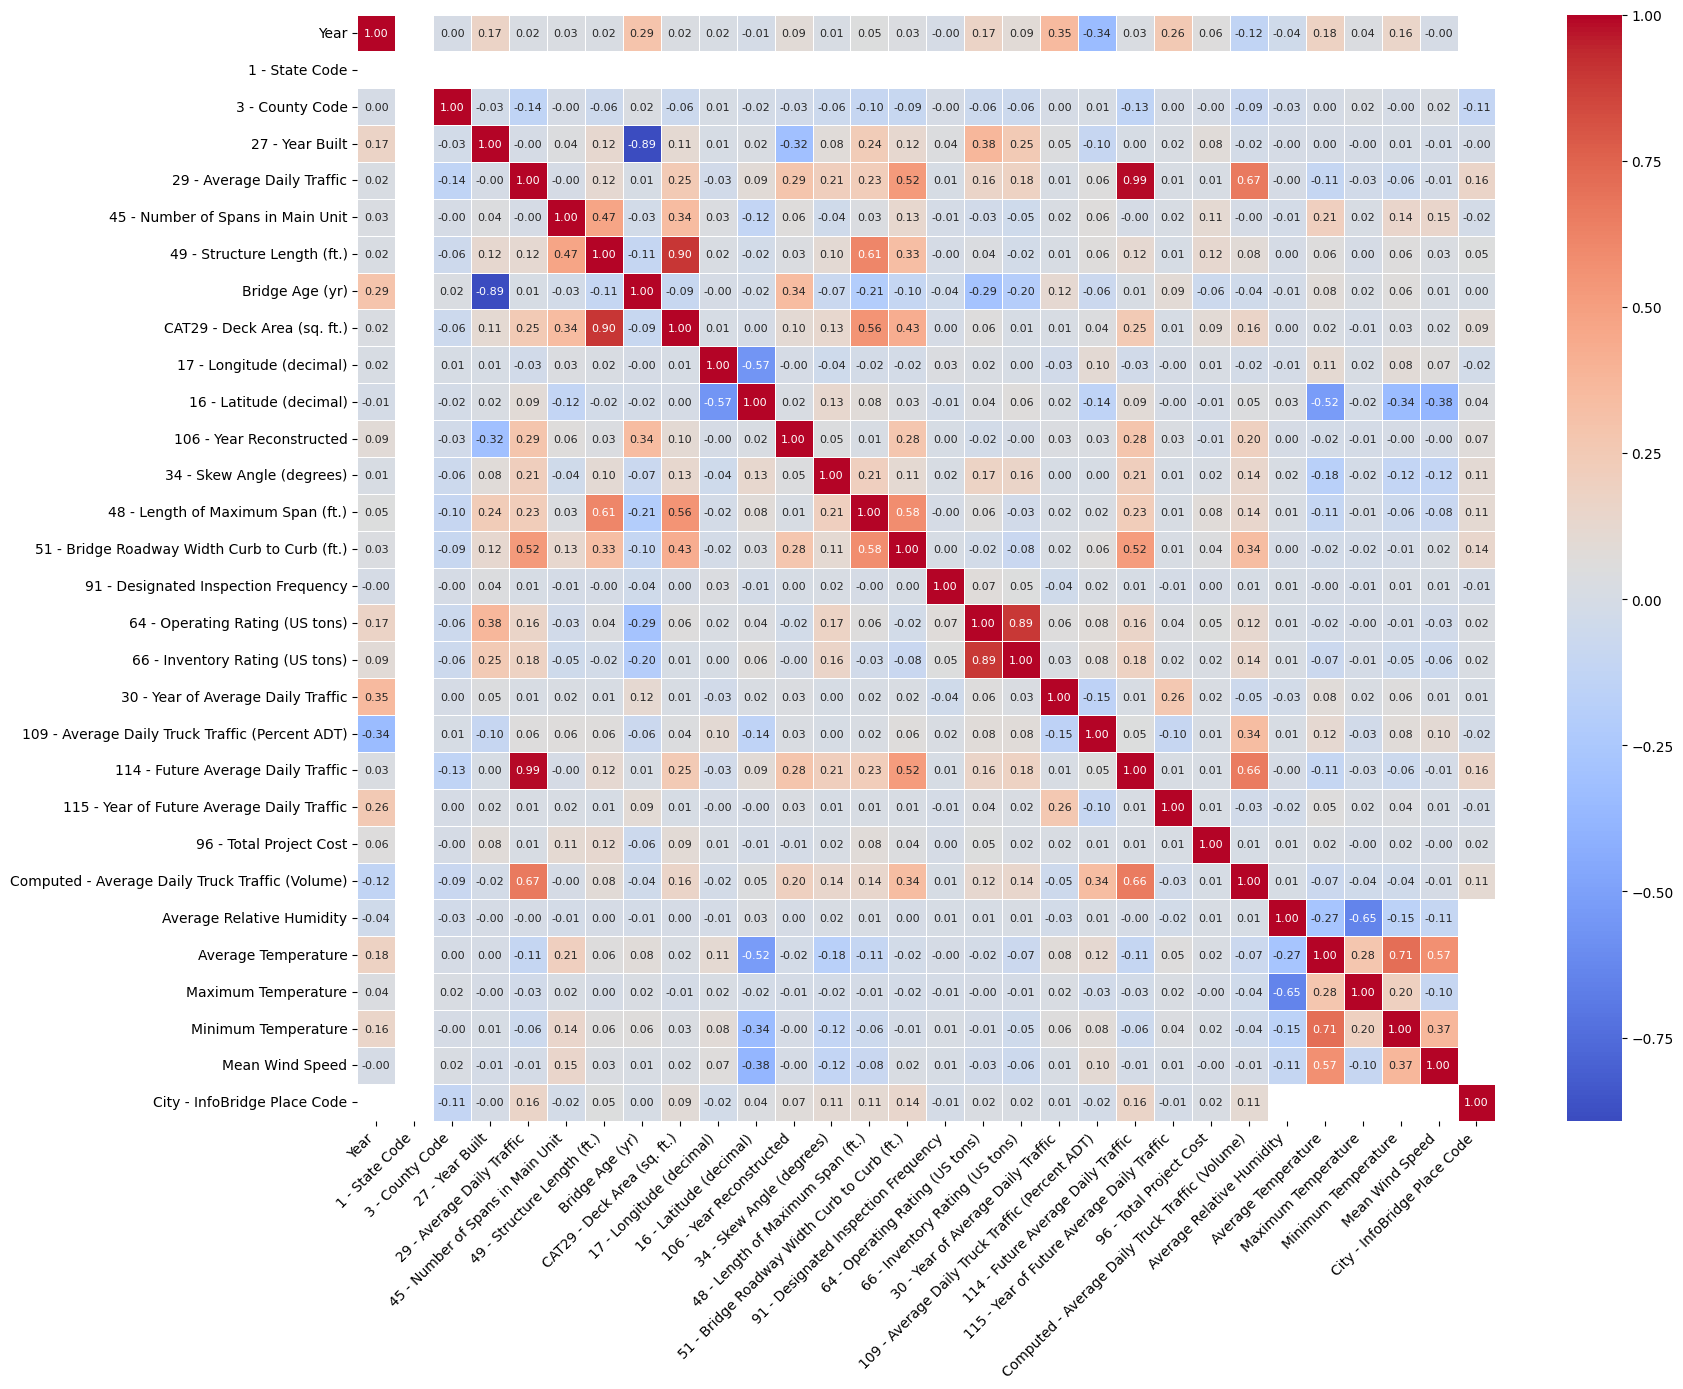

In [ ]:
# Ajuste del tamaño de la figura para mejorar la visualización
plt.figure(figsize=(18, 14))

# Crear el heatmap con opciones mejoradas
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8}, linewidths=0.5)

# Rotar las etiquetas de los ejes para evitar amontonamiento
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar el heatmap mejorado
plt.tight_layout()
plt.show()


##Pre-procesamiento de datos

###Reducción de columnas

Lo primero que se hará será eliminar las columnas problemáticas o innecesarias.
Anteriormente se identificaron algunas variables que poseían un único valor en toda la columna, se procede a la eliminación de las mismas.

In [10]:
# Identificar columnas constantes
columnas_constantes = [col for col in data.columns if data[col].nunique() == 1]

# Imprimir las columnas constantes (opcional, para verificar)
print("Columnas constantes:", columnas_constantes)

# Eliminar las columnas constantes
data = data.drop(columns=columnas_constantes)

Columnas constantes: ['1 - State Code', '1 - State Name']


Elimino las siguientes columnas porque tienen un alto porcentaje de valores nulos, cerca de un 96%

Además decido eliminar los Structure number pues solo sirven de indentificadores y no aportarán realmente información al análisis.

Y también 'Year' , debido a que es el año de captura de la información y no tiene que ver con la condición del puente.

También se elimina '3 - County Name' y Code

In [11]:
data = data.drop(columns=['3 - County Code','Year','City - InfoBridge Place Code', 'City - InfoBridge Place Name', '8 - Structure Number', '2022 NBI Structure Number', '3 - County Name'])

Ahora, el conjunto de datos se ha reducido considerablemente. A continuación observaré las variables categóricas restantes para ver cómo convertirlas a numéricas.

###Transformación de variables categóricas a numéricas

In [12]:
# Selecciona columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object', 'category']).columns
print(columnas_categoricas)

Index(['22 - Owner Agency', '43A - Main Span Material',
       '43B - Main Span Design', 'CAT10 - Bridge Condition',
       '58 - Deck Condition Rating', '59 - Superstructure Condition Rating',
       '60 - Substructure Condition Rating'],
      dtype='object')


In [13]:
for col in columnas_categoricas:
    print(f"{col}: {data[col].nunique()} valores únicos")

22 - Owner Agency: 19 valores únicos
43A - Main Span Material: 10 valores únicos
43B - Main Span Design: 17 valores únicos
CAT10 - Bridge Condition: 3 valores únicos
58 - Deck Condition Rating: 11 valores únicos
59 - Superstructure Condition Rating: 11 valores únicos
60 - Substructure Condition Rating: 11 valores únicos


Para la variable Bridge Condition, que tiene tres categorías ("Good", "Fair" y "Poor"), es conveniente hacer una conversión a valores numéricos mediante un mapeo ordinal, ya que estas categorías representan un orden lógico en términos de condición, donde "Good" indica la mejor condición y "Poor" la peor. Asignarles valores numéricos permite que el modelo interprete esta relación de manera ordenada.

In [14]:
#Mapeo para 'Bridge Condition'
bridge_condition_mapping = {'Good': 3, 'Fair': 2, 'Poor': 1}
data['CAT10 - Bridge Condition'] = data['CAT10 - Bridge Condition'].map(bridge_condition_mapping)

In [ ]:
variable= '22 - Owner Agency'
data[[variable]].value_counts()

,count
22 - Owner Agency,
County Highway Agency,208691
State Highway Agency,194659
City or Municipal Highway Agency,14299
Otro,3034
Town or Township Highway Agency,2872
Army,2083


En el fragmento de código anterior, se exploraron las variables categóricas y se descubrió que los ratings poseen al rededor de 170,000 valores ''N'' de los cuales no se tiene información sobre su rating (que por lo general va de 0 a 9), dado que el valor 'N' es el que tiene mayor frecuencia en los 3 ratings , considero que es impráctico borrar 170,000 filas que representan un gran porcentaje de los datos.

Y , dado que no creo que sea factible imputar los valores faltantes porque no tengo elementos para obtener dichos ratings , considero que es mejor eliminar las 3 columnas.

Finalmente, como la columna *CAT10 - Bridge Condition* , que no tiene valores faltantes, describe de forma general el estado del puente, las columnas de los ratings podrían contener información redundante, incluso estando completas.

Igualmente, se hace una verificación de lo comentado antes de proceder con la eliminación de las columnas.

In [15]:
# Verificar la cantidad de valores "N" en cada columna
n_deck = data['58 - Deck Condition Rating'].value_counts().get('N', 0)
n_superstructure = data['59 - Superstructure Condition Rating'].value_counts().get('N', 0)
n_substructure = data['60 - Substructure Condition Rating'].value_counts().get('N', 0)

print(f'Deck Condition N: {n_deck}')
print(f'Superstructure Condition N: {n_superstructure}')
print(f'Substructure Condition N: {n_substructure}')


Deck Condition N: 170156
Superstructure Condition N: 170183
Substructure Condition N: 170096


In [16]:
# Filas donde todas las condiciones son "N"
n_all = data[(data['58 - Deck Condition Rating'] == 'N') &
             (data['59 - Superstructure Condition Rating'] == 'N') &
             (data['60 - Substructure Condition Rating'] == 'N')].shape[0]

print(f'Filas con "N" en todas las condiciones: {n_all}')

Filas con "N" en todas las condiciones: 170077


In [17]:
data = data.drop(columns=['58 - Deck Condition Rating', '59 - Superstructure Condition Rating', '60 - Substructure Condition Rating'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425638 entries, 0 to 425637
Data columns (total 30 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   22 - Owner Agency                                425618 non-null  object 
 1   27 - Year Built                                  425636 non-null  float64
 2   29 - Average Daily Traffic                       425535 non-null  float64
 3   43A - Main Span Material                         425638 non-null  object 
 4   43B - Main Span Design                           425619 non-null  object 
 5   45 - Number of Spans in Main Unit                425624 non-null  float64
 6   49 - Structure Length (ft.)                      425638 non-null  float64
 7   CAT10 - Bridge Condition                         425619 non-null  float64
 8   Bridge Age (yr)                                  425636 non-null  float64
 9   CAT29 - Deck Ar

En este punto, se cuenta únicamente con 3 variables categóricas:

22 - Owner Agency: 19 valores únicos
43A - Main Span Material: 10 valores únicos
43B - Main Span Design: 17 valores únicos

Intuitivamente pienso que el material y el diseño tendrán un impacto relevante sobre la predicción, sin embargo, me interesa saber si Owner Agency podría tener alguna influencia.

Debido a que la variable de Owner Angency cuenta con demasiadas categorías y a que algunas tienen un conteo de valores muy pequeño en comparación con otras, veo conveniente crear una categoría que englobe a varias de las que tienen pocos valores, de ese modo, al tratar de convertir a numérica, será un poco más sencillo. Entonces, de tener 19 valores únicos, se tienen únicamente 6.

In [19]:
umbral = 1000
principales_categorias = data['22 - Owner Agency'].value_counts()[data['22 - Owner Agency'].value_counts() >= umbral].index

# Reemplazar categorías menos frecuentes por "Otro"
data['22 - Owner Agency'] = data['22 - Owner Agency'].apply(lambda x: x if x in principales_categorias else 'Otro')

Pienso que las variables categóricas sobre material y diseño tienen información relevante y no quisiera reducir sus categorías con el riesgo de perder la información, entonces así como están aplicaré one-hot encoding sobre estas, de forma tal que pueda quedarme únicamente con variables numéricas.

In [20]:
# Selecciona columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object', 'category']).columns
print(columnas_categoricas)

Index(['22 - Owner Agency', '43A - Main Span Material',
       '43B - Main Span Design'],
      dtype='object')


In [21]:
# plicar one-hot encoding a las tres columnas categóricas
data = pd.get_dummies(data, columns=['22 - Owner Agency', '43A - Main Span Material', '43B - Main Span Design'])

###Tratamiento de valores nulos

Dado que ya he eliminado columnas y convertido las variables categóricas a numéricas, lo siguiente es el tratamiento de valores nulos, para eso, quiero identificar cuáles tienen este tipo de valores faltantes.

In [22]:
nulos = data.isnull().sum()
nulos = nulos[nulos > 0]  # Filtrar solo las columnas con valores nulos
print("Columnas con valores nulos y su conteo:")
print(nulos)

Columnas con valores nulos y su conteo:
27 - Year Built                                        2
29 - Average Daily Traffic                           103
45 - Number of Spans in Main Unit                     14
CAT10 - Bridge Condition                              19
Bridge Age (yr)                                        2
106 - Year Reconstructed                           25318
34 - Skew Angle (degrees)                             35
51 - Bridge Roadway Width Curb to Curb (ft.)          13
91 - Designated Inspection Frequency                  18
64 - Operating Rating (US tons)                      612
66 - Inventory Rating (US tons)                      596
30 - Year of Average Daily Traffic                    51
109 - Average Daily Truck Traffic (Percent ADT)      585
114 - Future Average Daily Traffic                    13
115 - Year of Future Average Daily Traffic            88
96 - Total Project Cost                            72177
Computed - Average Daily Truck Traffic (Volume) 

Para iniciar, lo más sencillo es eliminar las 2 filas que tienen valores nulos en Year Built y Age, de hecho, son las mismas filas, entonces bastará hacer lo siguiente:

In [23]:
#Eliminar filas donde 'Year Built' es nulo
data = data.dropna(subset=['27 - Year Built'])

Luego, considero que es viable eliminar las filas de las variables que presenten menos de 100 valores nulos, pues no son demasiados datos comparados con el total de entradas.

In [24]:
#Identificar columnas con entre 1 y 99 valores nulos
menos_100_nulos = data.columns[(data.isnull().sum() > 0) & (data.isnull().sum() < 100)]

#Eliminar filas con valores nulos en esas columnas
data = data.dropna(subset=menos_100_nulos)

Con las variables restantes, primero empezaré el tratamiento para aquellas relacionadas al tráfico. Estuve observando el origen de los datos y los datos mismos y no encontré una forma de calcular los valores faltantes, por tal motivo, he decicido imputarlos basándome en la media por grupo, estos grupos estarán definidos por la variable *'30 - Year of Average Daily Traffic'* ,ya que esta registra el año en donde se tomó el dato del tráfico.

In [25]:
#Imputar la mediana por 'Year of Average Daily Traffic'
data['29 - Average Daily Traffic'] = data.groupby('30 - Year of Average Daily Traffic')['29 - Average Daily Traffic'].transform(lambda x: x.fillna(x.median()))
data['109 - Average Daily Truck Traffic (Percent ADT)'] = data.groupby('30 - Year of Average Daily Traffic')['109 - Average Daily Truck Traffic (Percent ADT)'].transform(lambda x: x.fillna(x.median()))
data['Computed - Average Daily Truck Traffic (Volume)'] = data.groupby('30 - Year of Average Daily Traffic')['Computed - Average Daily Truck Traffic (Volume)'].transform(lambda x: x.fillna(x.median()))

Tras este proceso, quedaron 42 registros con valores nulos, lo que puede significar que al rededor de estos no hay suficientes datos para tener una media significativa. Dado que son pocos, procederé a eliminarlos

In [26]:
# Eliminar filas con valores nulos restantes en las columnas de tráfico
data.dropna(subset=['109 - Average Daily Truck Traffic (Percent ADT)', 'Computed - Average Daily Truck Traffic (Volume)'], inplace=True)

Luego, se observa la variable *106 - Year Reconstructed* la cual cuenta con una gran cantidad de valores nulos: 25,305, sin embargo, estos tienen relevancia ya que indican que el punte no ha tenido reconstrucción, la estrategia a implementar es crear una nueva variable que indique si ha tenido reconstrucción o no.

Esto debido a que colocar un ''0'' podría hacer que el modelo malinterprete la información, en lugar de entenderse que no ha habido reconstrucción, se podría entender que esta fue en el año ''0''.

En caso de ver más adelante que esta variable es relevante en el análisis, podemos explorar qué tanto influye el año de reconstrucción.

In [27]:
data['Reconstructed'] = data['106 - Year Reconstructed'].notnull().astype(int)
data.drop(columns=['106 - Year Reconstructed'], inplace=True)

Luego, analizando la variable 'Total Project Cost', si bien, de tener los datos correctos podría ser relevante para ver si la inversión realizada es proporcional a la calidad del puente, hay una gran cantidad de valores nulos. No solo eso, oscilan desde valores como 0,1,... hasta 999,999. Lo que sugiere que muchas veces no se hizo una captura del costo del proyecto o no se le dio relevancia en su momento y no se tienen datos precisos. Por tal motivo, considero que lo mejor es eliminarla.



In [28]:
# Eliminar la columna 'Total Project Cost'
data.drop(columns=['96 - Total Project Cost'], inplace=True)

Luego, para las variables que hablan sobre carga, no fui capaz de encontrar un patrón que me sugiera agrupar los datos para imputar la mediana de ese segmento, entonces, para no eliminar los datos, utilizo la mediana general, creo que es una buena medida considerando que el rango en que se mueven los datos no es demasiado amplio. Por lo que , de haber error, creo que puede ser mínimo.

In [29]:
#Imputar valores nulos con la mediana general
data['64 - Operating Rating (US tons)'] = data['64 - Operating Rating (US tons)'].fillna(data['64 - Operating Rating (US tons)'].median())
data['66 - Inventory Rating (US tons)'] = data['66 - Inventory Rating (US tons)'].fillna(data['66 - Inventory Rating (US tons)'].median())

Finalmente, quedan las variables de clima, las cuales tienen 16742 valores nulos cada una, siendo esta una cantidad considerable como para simplemente eliminarla.

Sin embargo, creo que es importante recordar que todos los puentes están ubicados dentro del estado de Georgia, por lo que cualquier dato faltante, debería moverse en un rango delimiatado por los valores existentes.

Aún así, hay diferencias entre las zonas montañosas y costeras, sin embargo, se tiene los datos de latitud y longitud, por lo que se agruparán los datos con esta información y se imputarán los valores de la mediana dentro de esos grupos.

In [30]:
#Imputar las variables de clima según la mediana en cada grupo de (latitud, longitud)
data['Average Relative Humidity'] = data.groupby(['16 - Latitude (decimal)', '17 - Longitude (decimal)'])['Average Relative Humidity'].transform(lambda x: x.fillna(x.median()))
data['Average Temperature'] = data.groupby(['16 - Latitude (decimal)', '17 - Longitude (decimal)'])['Average Temperature'].transform(lambda x: x.fillna(x.median()))
data['Maximum Temperature'] = data.groupby(['16 - Latitude (decimal)', '17 - Longitude (decimal)'])['Maximum Temperature'].transform(lambda x: x.fillna(x.median()))
data['Minimum Temperature'] = data.groupby(['16 - Latitude (decimal)', '17 - Longitude (decimal)'])['Minimum Temperature'].transform(lambda x: x.fillna(x.median()))
data['Mean Wind Speed'] = data.groupby(['16 - Latitude (decimal)', '17 - Longitude (decimal)'])['Mean Wind Speed'].transform(lambda x: x.fillna(x.median()))

Tras este proceso, los valores nulos se redujeron a 1941 para cada una de las variables de clima lo que indica que algunas combinaciones de latitud y longitud no tenían datos suficientes para calcular la mediana en su grupo.

Dado que es una cantidad que aún podría ser significativa como para simplemente eliminarla, se aplicará la mediana general.

In [31]:
# Imputar valores nulos restantes con la mediana general
data['Average Relative Humidity'] = data['Average Relative Humidity'].fillna(data['Average Relative Humidity'].median())
data['Average Temperature'] = data['Average Temperature'].fillna(data['Average Temperature'].median())
data['Maximum Temperature'] = data['Maximum Temperature'].fillna(data['Maximum Temperature'].median())
data['Minimum Temperature'] = data['Minimum Temperature'].fillna(data['Minimum Temperature'].median())
data['Mean Wind Speed'] = data['Mean Wind Speed'].fillna(data['Mean Wind Speed'].median())

De ese modo , el conjunto de datos queda compuesto únicamente variables numéricas sin valores nulos.

In [32]:
nulos = data.isnull().sum()
nulos = nulos[nulos > 0]  # Filtrar solo las columnas con valores nulos
print("Columnas con valores nulos y su conteo:")
print(nulos)

Columnas con valores nulos y su conteo:
Series([], dtype: int64)


##Random Forest

Tras realizar el análisis exploratorio de datos y preparar los mismos para que puedan utilizarse con algoritmos de machine learning, es importante identificar las características más relevantes para un modelo de clasificación, recordando que el objetivo es poder identificar , con base en información, la condición del puente (buena, regular, mala)

###Todas las características

En este punto, debido al uso de one-hot encoding, se han generado diferentes columnas, quiero aprovechar que el algoritmo de random forest puede trabajar con conjuntos de datos grandes y con alta dimensionalidad para ver si puedo depurar un poco el conjunto de datos principal.

In [33]:
data.columns

Index(['27 - Year Built', '29 - Average Daily Traffic',
       '45 - Number of Spans in Main Unit', '49 - Structure Length (ft.)',
       'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       'CAT29 - Deck Area (sq. ft.)', '17 - Longitude (decimal)',
       '16 - Latitude (decimal)', '34 - Skew Angle (degrees)',
       '48 - Length of Maximum Span (ft.)',
       '51 - Bridge Roadway Width Curb to Curb (ft.)',
       '91 - Designated Inspection Frequency',
       '64 - Operating Rating (US tons)', '66 - Inventory Rating (US tons)',
       '30 - Year of Average Daily Traffic',
       '109 - Average Daily Truck Traffic (Percent ADT)',
       '114 - Future Average Daily Traffic',
       '115 - Year of Future Average Daily Traffic',
       'Computed - Average Daily Truck Traffic (Volume)',
       'Average Relative Humidity', 'Average Temperature',
       'Maximum Temperature', 'Minimum Temperature', 'Mean Wind Speed',
       '22 - Owner Agency_Army',
       '22 - Owner Agency_City or Munici

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=['CAT10 - Bridge Condition'])
y = data['CAT10 - Bridge Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9348

Confusion Matrix:
[[ 2736   483    79]
 [  193 32359  2645]
 [   14  2137 44440]]


Para evaluar qué tan bueno fue el modelo, obtenemos un Accuracy de 0.93 que indica que Random Forest logró clasificar correctamente un alto porcentaje de los datos.

Dado que el modelo resultó bastante bueno, considero que es valioso obtener cuáles fueron las características que más influyeron en ese resultado.

In [36]:
# Importancia de las características
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                                              feature  importance
4                                     Bridge Age (yr)    0.087862
0                                     27 - Year Built    0.084784
6                            17 - Longitude (decimal)    0.077331
7                             16 - Latitude (decimal)    0.068394
12                    64 - Operating Rating (US tons)    0.062424
5                         CAT29 - Deck Area (sq. ft.)    0.051585
13                    66 - Inventory Rating (US tons)    0.048821
3                         49 - Structure Length (ft.)    0.042198
9                   48 - Length of Maximum Span (ft.)    0.040143
1                          29 - Average Daily Traffic    0.039823
16                 114 - Future Average Daily Traffic    0.039052
10       51 - Bridge Roadway Width Curb to Curb (ft.)    0.033797
20                                Average Temperature    0.032498
22                                Minimum Temperature    0.029009
18    Comp

Quisiera ver ahora si el modelo puede beneficiarse de una reducción de características, en el fragmento de código anterior se puede observar que variables relacionadas con el diseñom material o con owner agency no aportan mucho al modelo y quizás sea buena idea prescindir de ellas.

###Selección de características

Se empezará una prueba en donde se utilicen las variables que, dentro de la lista de importancia, supere el 0.01

In [38]:
# Filtrar las características por importancia
important_features = feature_importance_df[feature_importance_df['importance'] >= 0.01]['feature'].tolist()

# Crear un nuevo conjunto de datos con solo las características importantes
X_reduced = X[important_features]
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Entrenar un nuevo modelo
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_red, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluar el nuevo modelo
y_pred_red = rf_model_reduced.predict(X_test_red)
accuracy_red = accuracy_score(y_test, y_pred_red)
conf_matrix_red = confusion_matrix(y_test, y_pred_red)

print(f"Reduced Model Accuracy: {accuracy_red:.4f}")
print("\nReduced Model Confusion Matrix:")
print(conf_matrix_red)

Reduced Model Accuracy: 0.9350

Reduced Model Confusion Matrix:
[[ 2738   492    68]
 [  199 32438  2560]
 [   18  2195 44378]]


Si bien al reducir las características, el accuracy del modelo no aumentó más que 0.0002 , sí se puede obtener un beneficio de esto al tener un modelo mucho más simple en cuanto a cantidad de variables, de ese modo se ahorran recursos de tiempo y cómputo.

In [40]:
# Obtener la importancia de las características del nuevo modelo
importances = rf_model_reduced.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_reduced.columns, 'importance': importances})

# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                                            feature  importance
1                                   27 - Year Built    0.099559
0                                   Bridge Age (yr)    0.087860
2                          17 - Longitude (decimal)    0.084914
3                           16 - Latitude (decimal)    0.075831
4                   64 - Operating Rating (US tons)    0.073190
5                       CAT29 - Deck Area (sq. ft.)    0.056273
6                   66 - Inventory Rating (US tons)    0.054403
8                 48 - Length of Maximum Span (ft.)    0.047959
7                       49 - Structure Length (ft.)    0.046259
9                        29 - Average Daily Traffic    0.041569
11     51 - Bridge Roadway Width Curb to Curb (ft.)    0.040798
10               114 - Future Average Daily Traffic    0.040501
12                              Average Temperature    0.031570
13                              Minimum Temperature    0.030197
14  Computed - Average Daily Truck Traff

Como era de esperarse, la importancia de las características es bastante similar que en la primera prueba.

Se observa que aquellas que más influyen dentro del modelo son el año de construcción y la edad del puente, ambas van de la mano pero tienen un peso importante en el modelo, lo cuál tiene sentido, porque la edad del puente debe aportar información sobre su estado actual.

Las variables que yo no esperaba que tuvieran tanta relevancia de forma inicial son las de latitud y longitud, pero también tiene sentido, pues la posición geográfica tiene información implícita sobre condiciones climatológicas, altura, presión y demás que pueden influir en la condición del puente.

Luego, en 5to lugar de importancia se tiene el Operating Rating, que indica la capacidad de carga del puente en su estado actual, un valor alto generalmente indica que el puente todavía puede soportar una carga considerable, lo que sugiere que está en buen estado estructural. Por el contrario, un rating más bajo podría indicar que el puente ha sufrido suficiente desgaste como para limitar su capacidad de carga. Entonces también es lógico pensar que tiene un peso considerable para determinar la condición del puente.

###Prueba reduciendo a 5 caracteristicas

In [41]:
# Seleccionar las 5 características más importantes
top_5_features = feature_importance_df.head(5)['feature'].tolist()

X_top5 = data[top_5_features]

# Dividir en conjuntos de entrenamiento y prueba
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)

# Entrenar un nuevo modelo
rf_model_top5 = RandomForestClassifier(random_state=42)
rf_model_top5.fit(X_train_top5, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Evaluar el nuevo modelo
y_pred_top5 = rf_model_top5.predict(X_test_top5)
accuracy_top5 = accuracy_score(y_test, y_pred_top5)
conf_matrix_top5 = confusion_matrix(y_test, y_pred_top5)

# Resultados
print(f"Accuracy con las 5 características más importantes: {accuracy_top5:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_top5)

Accuracy con las 5 características más importantes: 0.9477

Matriz de Confusión:
[[ 2941   319    38]
 [  215 32999  1983]
 [   24  1869 44698]]


Con esta reducción a 5 características el modelo aumenta su precisión general, lo cual es bueno en el sentido de ahorro de recursos, además, es interesante ver que muchas de las variables iniciales que parecía que sería muy relevantes como el material, realmente no aportaban mucha información para la clasificación.

Con esto, pueden ingresarse únicamente 5 datos y se obtendrá una clasificación bastante acertada.